In [ ]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, accuracy_score, confusion_matrix, davies_bouldin_score

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the dataset
df = pd.read_csv("Customer_Data.csv")

In [ ]:
df = df.drop(columns=["CustomerID", "Gender"])

In [ ]:
# basic information about columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     200 non-null    int64
 1   Annual Income (k$)      200 non-null    int64
 2   Spending Score (1-100)  200 non-null    int64
dtypes: int64(3)
memory usage: 4.8 KB


In [ ]:
# count null values in each column
df.isnull().sum()

Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
# Scale the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

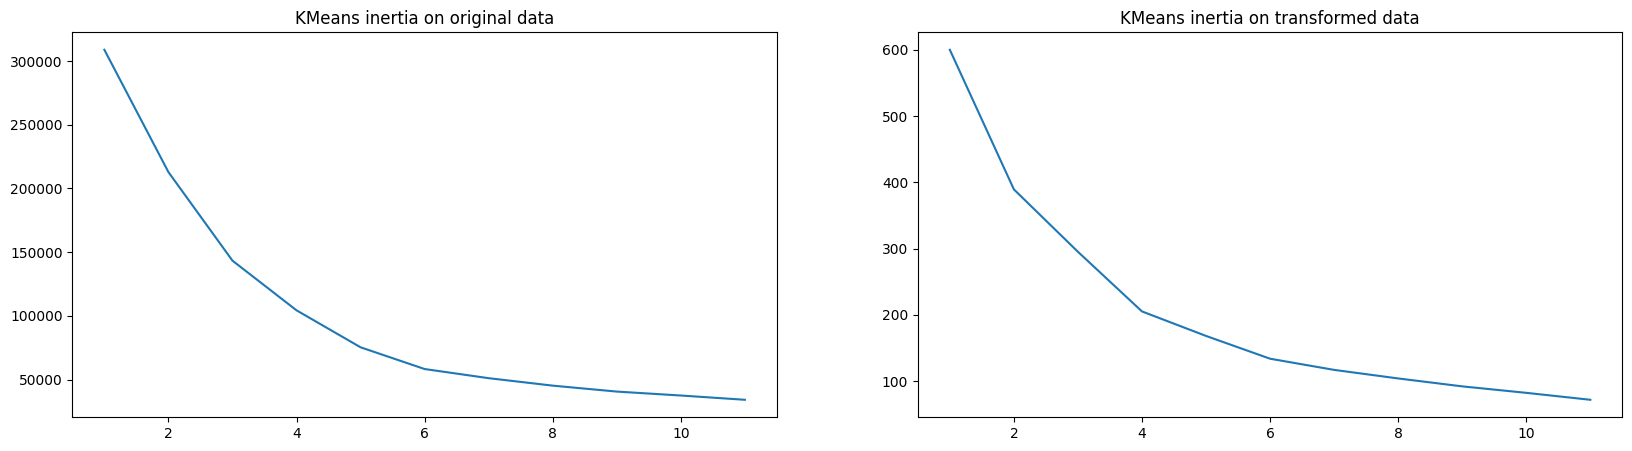

In [ ]:
# untransformed data
inertia = []
for i in range(1, 12):
    km = KMeans(n_clusters=i).fit(df)
    inertia.append(km.inertia_)

# transformed data
inertia_t = []
for i in range(1, 12):
    km = KMeans(n_clusters=i).fit(df_scaled)
    inertia_t.append(km.inertia_)

# plot results
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.lineplot(x=range(1,12), y=inertia)
plt.title('KMeans inertia on original data')

plt.subplot(1,2,2)
sns.lineplot(x=range(1,12), y=inertia_t)
plt.title('KMeans inertia on transformed data')

plt.show()

In [ ]:
# True labels based on income and spending score
true_labels = np.where((df['Annual Income (k$)'] > df['Annual Income (k$)'].mean()) &
                       (df['Spending Score (1-100)'] > df['Spending Score (1-100)'].mean()), 1, 0)

# Define the number of clusters to evaluate
clusters = [2, 3, 4, 5]

In [ ]:
df_scaled_df = pd.DataFrame(df_scaled, columns=['Age', 'Annual Income', 'Spending Score'])

In [ ]:
# Initialize dictionaries to store evaluation metrics
silhouette_scores = {}
accuracy_scores = {}
purity_scores = {}
davies_bouldin_scores = {}
cluster_centers = {}

for c in clusters:
    km = KMeans(n_clusters=c).fit(df_scaled_df[['Age', 'Annual Income', 'Spending Score']])
    df_scaled_df['cluster' + str(c)] = km.labels_
    cluster_centers[str(c)] = km.cluster_centers_

In [ ]:

# Iterate over different numbers of clusters
for c in clusters:
    # Initialize KMeans clustering
    km = KMeans(n_clusters=c, n_init=20, random_state=42)
    km.fit(df_scaled)

    # Predicted labels based on clustering
    predicted_labels = km.labels_

    # Silhouette score
    silhouette_scores[c] = silhouette_score(df_scaled, km.labels_)

    # Accuracy score
    accuracy_scores[c] = accuracy_score(true_labels, predicted_labels)

    # Purity score
    cm = confusion_matrix(true_labels, predicted_labels)
    purity_scores[c] = np.sum(np.amax(cm, axis=0)) / np.sum(cm)

    # Davies-Bouldin score
    davies_bouldin_scores[c] = davies_bouldin_score(df_scaled, km.labels_)

In [ ]:
# Print silhouette scores
print("Silhouette Scores:")
for c in clusters:
    print(f"\tNumber of clusters: {c}, Silhouette Score: {silhouette_scores[c]}")

# Print accuracy scores
print("\nAccuracy Scores:")
for c in clusters:
    print(f"\tNumber of clusters: {c}, Accuracy Score: {accuracy_scores[c]}")

# Print purity scores
print("\nPurity Scores:")
for c in clusters:
    print(f"\tNumber of clusters: {c}, Purity Score: {purity_scores[c]}")

# Print Davies-Bouldin scores
print("\nDavies-Bouldin Scores:")
for c in clusters:
    print(f"\tNumber of clusters: {c}, Davies-Bouldin Score: {davies_bouldin_scores[c]}")

Silhouette Scores:
	Number of clusters: 2, Silhouette Score: 0.33547192894004574
	Number of clusters: 3, Silhouette Score: 0.357793388710272
	Number of clusters: 4, Silhouette Score: 0.4039582785148566
	Number of clusters: 5, Silhouette Score: 0.41664341513732767

Accuracy Scores:
	Number of clusters: 2, Accuracy Score: 0.705
	Number of clusters: 3, Accuracy Score: 0.525
	Number of clusters: 4, Accuracy Score: 0.39
	Number of clusters: 5, Accuracy Score: 0.41

Purity Scores:
	Number of clusters: 2, Purity Score: 0.76
	Number of clusters: 3, Purity Score: 0.955
	Number of clusters: 4, Purity Score: 0.96
	Number of clusters: 5, Purity Score: 0.96

Davies-Bouldin Scores:
	Number of clusters: 2, Davies-Bouldin Score: 1.2606822880201844
	Number of clusters: 3, Davies-Bouldin Score: 1.050270139649266
	Number of clusters: 4, Davies-Bouldin Score: 0.9307956868103672
	Number of clusters: 5, Davies-Bouldin Score: 0.874551051002418


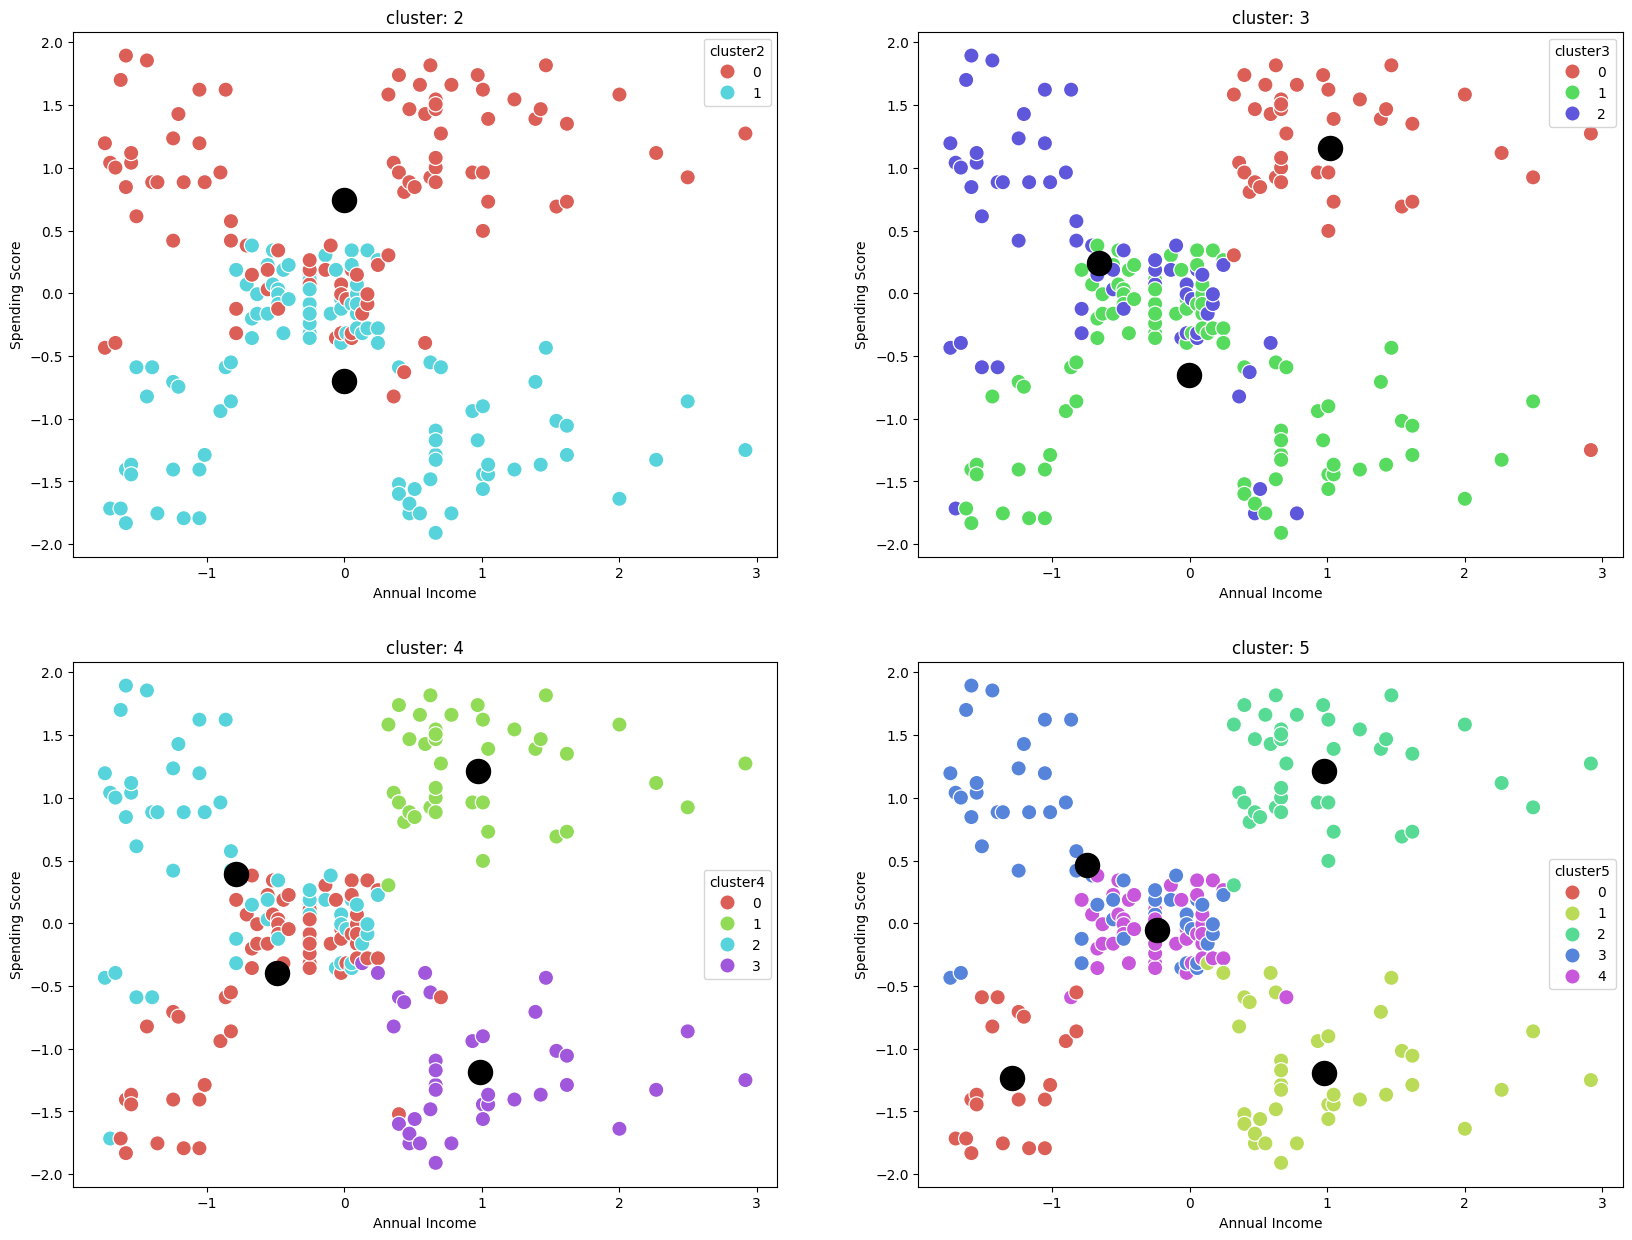

In [ ]:
# Plotting
plt.figure(figsize=(20, 15))
for i, c in enumerate(clusters):
    plt.subplot(2, 2, i+1)
    sns.scatterplot(x='Annual Income', y='Spending Score', hue='cluster' + str(c), data=df_scaled_df, s=120, palette=sns.color_palette("hls", c))
    cluster_centers_array = np.array(cluster_centers[str(c)])
    plt.scatter(cluster_centers_array[:, 1], cluster_centers_array[:, 2], color='black', s=300)
    plt.title('cluster: ' + str(c))

plt.show()

In [ ]:
import pickle


In [ ]:
filename = 'kmeans_model.pkl'

with open('kmeans_model.pkl', 'wb') as file:
    pickle.dump(km, file)
